# Rank-frequency analysis
We want to take a look at the rank frequency curve of our datasets. We do this to
examine the hypothesis, that in simple language, there is less variation in words,
since sentences aim to be readable, not stylistically appealing.
To test this, we first gather our data, remove some basic punctuation
and then plot some curves that indicate the frequency of words.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df_simple = pd.read_csv("clean_data/clean_leichte_sprache.csv")
display(df_simple)

,Unnamed: 0,text,label
0,0,Fernseh-Preise Die Grimme-Preise sind die wic...,Kultur
1,1,Film-Festival in Berlin Jedes Jahr gibt es in ...,Kultur
2,2,Preise für Schulen 7 Schulen in Deutschland ha...,Kultur
3,3,Party in Liverpool In der Stadt Liverpool in d...,Kultur
4,4,Deutschland gibt Kunst zurück Das afrikanische...,Kultur
...,...,...,...
4549,5819,Neue Bildungs-Ministerin Johanna Wanka ist neu...,Nachrichten
4550,5820,Homo-Ehe in Frankreich In Frankreich können sc...,Nachrichten
4551,5821,Nord-Korea testet Atom-Bombe Nord-Korea hat e...,Nachrichten
4552,5822,Obama hält wichtige Rede Der Präsident der USA...,Nachrichten


In [3]:
df_poli = pd.read_csv("clean_data/clean_politik_normal.csv")
df_cult = pd.read_csv("clean_data/clean_kultur_normal.csv")
df_sport = pd.read_csv("clean_data/clean_sport_normal.csv")
# read our dataframes from the cleaned csvs from the other notebook

In [4]:
# to extract a list of words from each dataframe we use a method that also removes some
# basic punctuation.
def extract_input_words(df) :
    input_words = []
    for text in df["text"] : # take each text from our df
        for word in text.lower().split(" ") :  # convert all to lower key, and split at spaces
            if word[-1:] in [",", ".", "?", "!"] :
                input_words.append(word[:-1]) #remove most common punctuation
            else:
                input_words.append(word)
            
    return input_words # return a list of all words

Now that we have our dataframes read and our method set up, we can start extracting the word lists, and counting frequencies.

In [5]:
input_words_simple = extract_input_words(df_simple)
frequency_simple = Counter(input_words_simple)
# frequency_simple is a dict, with the words as the keys and their occurrence as their value

values_simple = list(frequency_simple.values())
unique_words_simple = len(list(frequency_simple.keys()))
total_words_simple = len(input_words_simple)

array_simple = np.array(values_simple)

sorted_array_simple = np.sort(array_simple)[::-1] #this reverses the order, since we want the highest occurrence at the start

In [6]:
input_words_poli = extract_input_words(df_poli)
input_words_cult = extract_input_words(df_cult)
input_words_sport = extract_input_words(df_sport)

input_words_normal = input_words_poli + input_words_cult + input_words_sport
# we want to combine all categories, as thats what the simple language df contained
# also this has the added benefit that we now have roughly equal amounts of words in both lists.

frequency_normal = Counter(input_words_normal) # counts the frequency of each word

values_normal = list(frequency_normal.values())
unique_words_normal = len(list(frequency_normal.keys()))
total_words_normal = len(input_words_normal)

array = np.array(values_normal)

sorted_array_normal = np.sort(array)[::-1] #this reverses the order

In [7]:
print("Simple language:")
print(total_words_simple, "total words", unique_words_simple, "unique words")
print("highest occurrence:", sorted_array_simple[0], "occurrence of the word at position 5000:", sorted_array_simple[4999])

print("Normal language:")
print(total_words_normal, "total words", unique_words_normal, "unique words")
print("highest occurrence:", sorted_array_normal[0], "occurrence of the word at position 5000:", sorted_array_normal[4999])


Simple language:
719337 total words 37717 unique words
highest occurrence: 27475 occurrence of the word at position 5000: 9
Normal language:
669325 total words 79309 unique words
highest occurrence: 23195 occurrence of the word at position 5000: 12


Now we have all the data we need. We have the total number of words in both our sets, along with the number of unique words in each set, and the occurrence of each word.
In our plot, we will only include the first 5000 words, as to not crowd the plot with too many low frequency words.
We chose 5000 as the cutoff, as in both cases we're not yet at the single occurence words, but definitely low enough
where the shape of the curve will be evident.

## Plots
We want to plot a rank frequency curve of our data. Alongside with this, we will plot the difference
between the two curves separately, for the area we're interested in.

We will plot the rank frequency curve on a log scale, as zipfs law tells us, that the
distribution will be a logarithmic one.

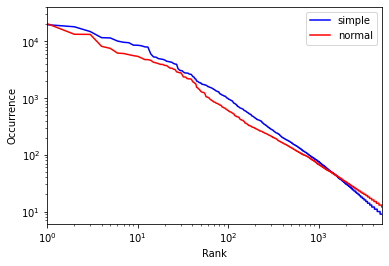

In [8]:
#Standard rank frequency curve

y_axis_simple = sorted_array_simple[:4999]
plt.plot(y_axis_simple, color= "blue", label="simple") # simple language plotted in blue
plt.yscale("log")
plt.xscale("log")

y_axis_normal = sorted_array_normal[:4999]
plt.plot(y_axis_normal, color="red", label="normal") # normal language in red
plt.yscale("log")
plt.xscale("log")

plt.margins(x=0) # to have the axis start right where the axis lines meet, neater visuals.
plt.xlabel("Rank")
plt.ylabel("Occurrence")
# labelling the x and y axis

plt.legend() # to show the labels for our lines.

plt.savefig("metadata/rank_frequency_plot.png", bbox_inches="tight")
plt.show()

In [9]:
# We want to look at the difference between the two lines in the previous plot.
# Since for the later ranks the difference will be fairly stable we will only look at the first 500 words

diff = sorted_array_simple[:499] - sorted_array_normal[:499]

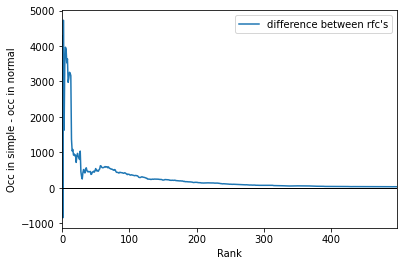

In [12]:
plt.plot(diff, label="difference between rfc's")

plt.axhline(y=0, color="black", linewidth="1") # to see the x axis in the plot
plt.margins(x=0)
plt.xlabel("Rank")
plt.ylabel("Occ in simple - occ in normal")

plt.legend()

plt.savefig("metadata/difference_plot.png", bbox_inches="tight")
plt.show()

Author: Henri Thölke